# Fetal Health Classification



## Brief about the problem
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [284]:
df=pd.read_csv("Downloads/fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [285]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [286]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [287]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


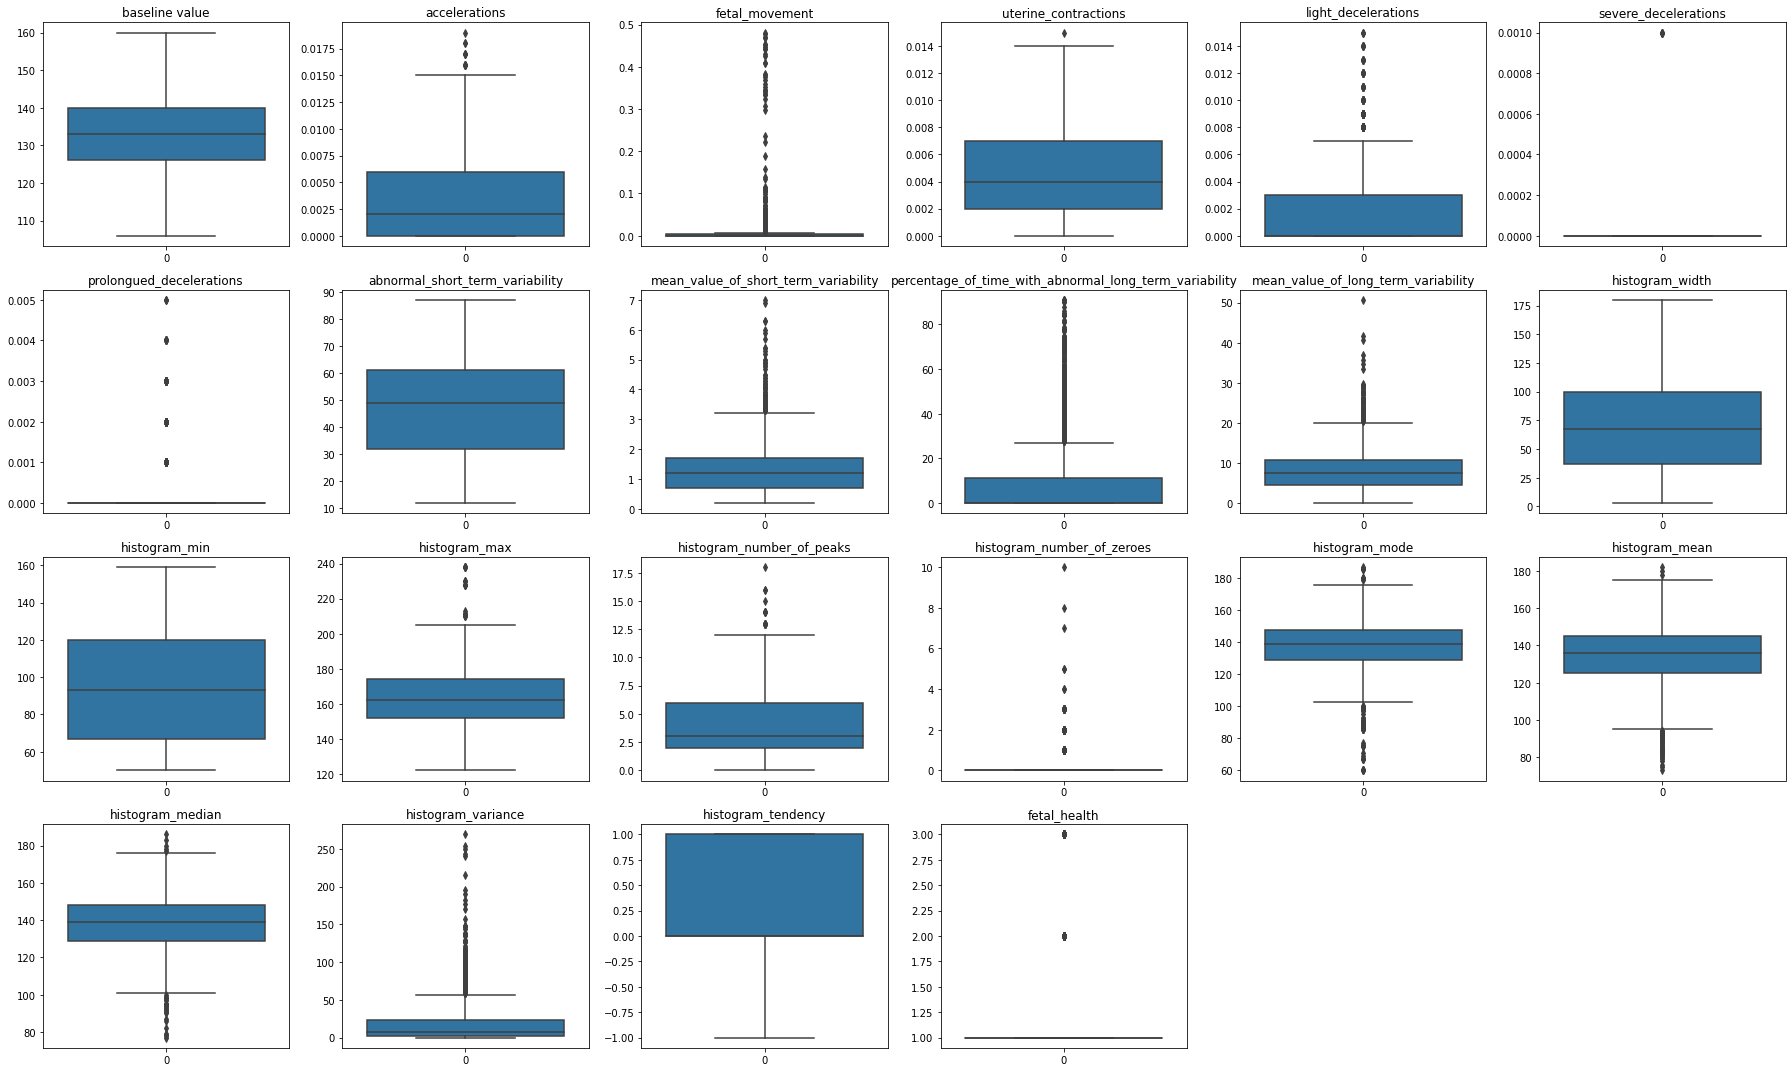

In [288]:
plt.figure(figsize=(25,15))
df_plot=df.copy()
for i,column in enumerate(df_plot.columns):
    plt.subplot(4,6,i+1)
    sns.boxplot(data=df_plot[column])
    plt.title(column)
plt.tight_layout()
plt.show()

<AxesSubplot:>

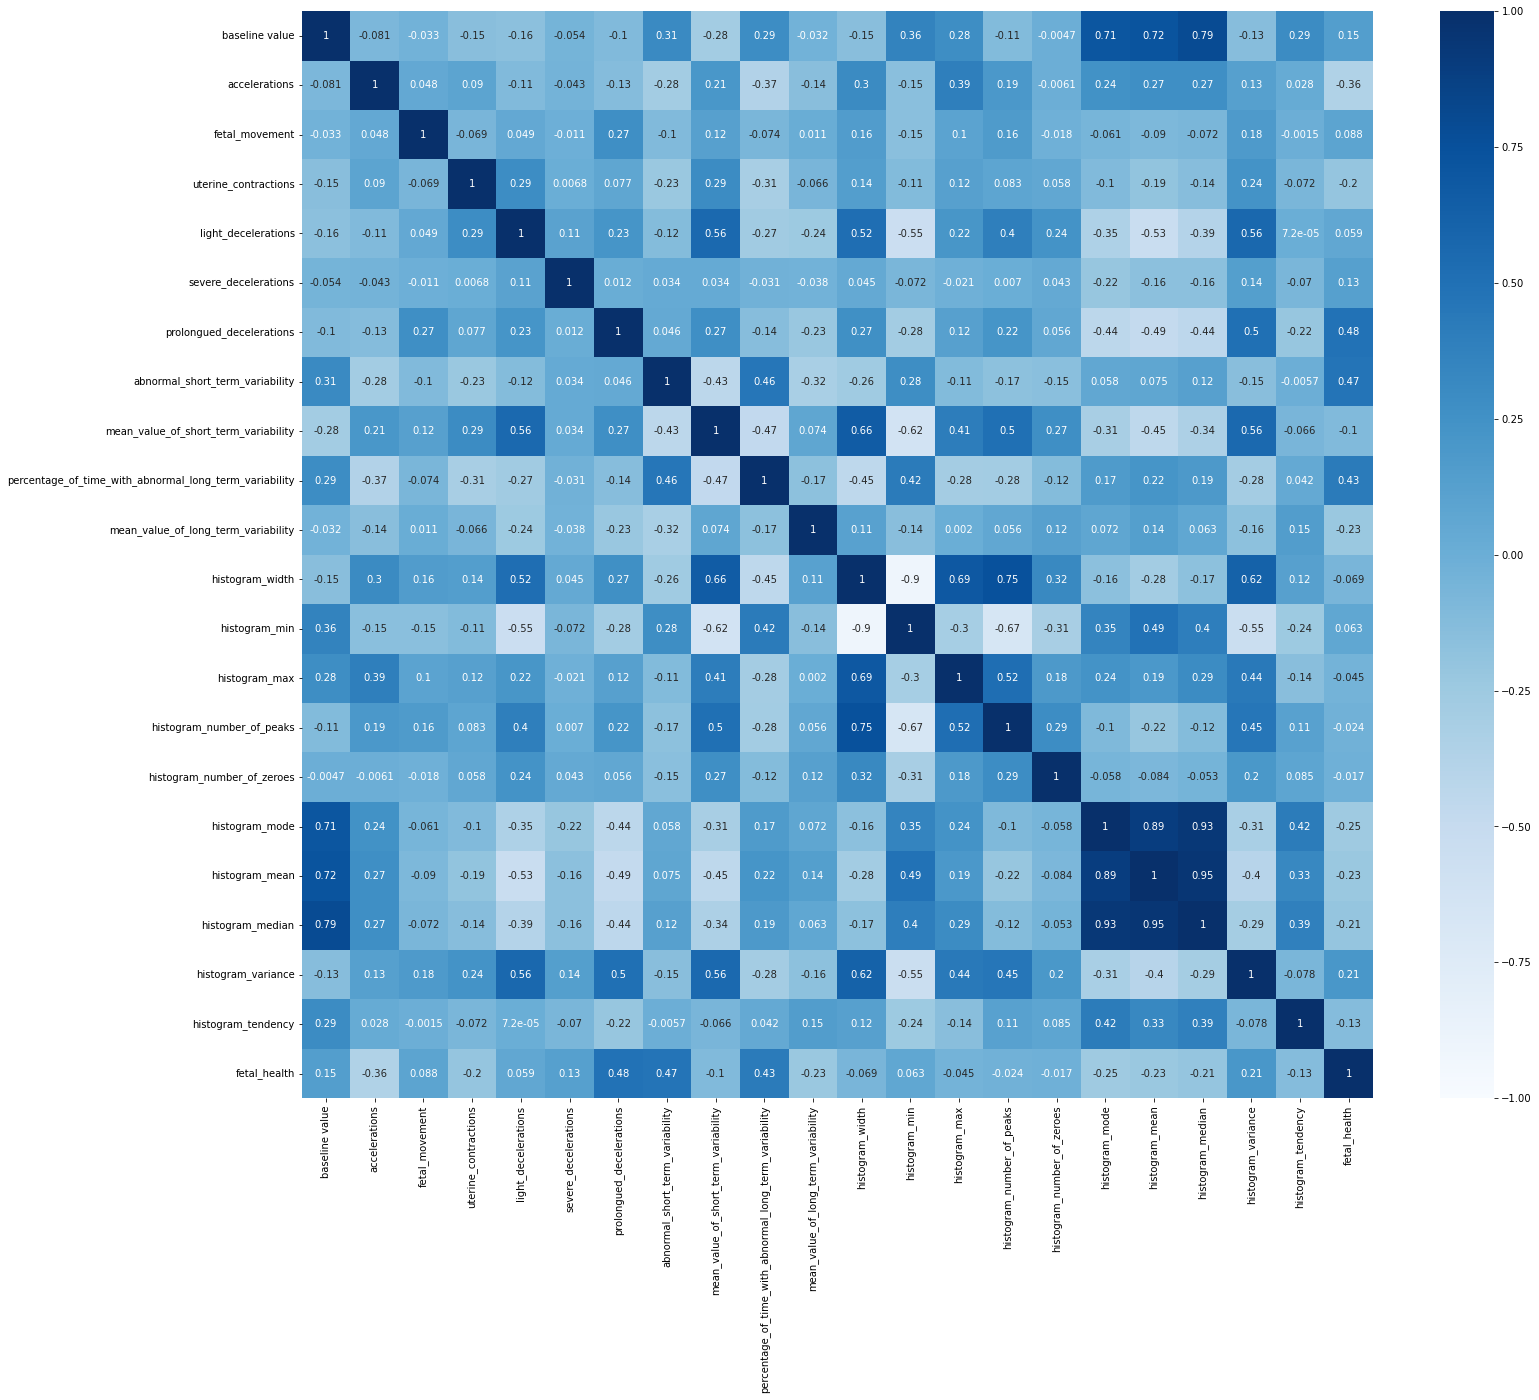

In [289]:
correlation = df_plot.corr()
plt.figure(figsize=(24,20))
sns.heatmap(correlation, annot= True , vmin=-1.0,cmap='Blues')

Text(0.5, 1.0, 'Data distribution')

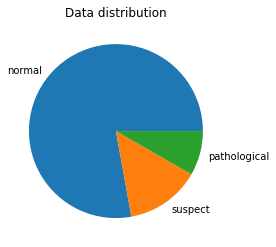

In [290]:
classes = ['normal','suspect','pathological']
plt.pie(df_plot["fetal_health"].value_counts(),labels=classes)
plt.title('Data distribution')

In [291]:
def preprocess_iputs(df):
    df=df.copy()
    df['fetal_health']=df['fetal_health'].replace({1.0:'normal',2.0:'suspect',3.0:'pathological'})
    y=df['fetal_health']
    x=df.drop('fetal_health',axis=1)
    x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=5)
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame( scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
    x_test=pd.DataFrame( scaler.transform(x_test),index=x_test.index,columns=x_test.columns)
    return  x_train,x_test,y_train,y_test

In [292]:
x_train,x_test,y_train,y_test= preprocess_iputs(df)

# Logistic Regression

In [293]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [294]:
print(logistic_model.score(x_train,y_train))
print(logistic_model.score(x_test,y_test))

0.9088235294117647
0.8873239436619719


In [295]:
y_pred = logistic_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))


0.8873239436619719


In [296]:
cm =metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
cr= classification_report(y_test,y_pred)
print(cm)
print(cr)

[[319   5  11]
 [  4  19   7]
 [ 17   4  40]]
              precision    recall  f1-score   support

      normal       0.94      0.95      0.95       335
pathological       0.68      0.63      0.66        30
     suspect       0.69      0.66      0.67        61

    accuracy                           0.89       426
   macro avg       0.77      0.75      0.76       426
weighted avg       0.88      0.89      0.89       426



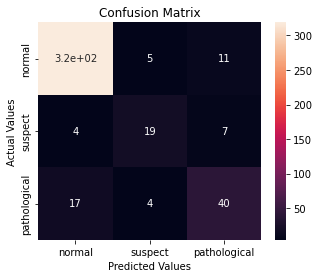

In [297]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Decision Tree

In [298]:
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [299]:
print(DecisionTree_model.score(x_train,y_train))
print(DecisionTree_model.score(x_test,y_test))

0.9994117647058823
0.9107981220657277


In [300]:
y_pred = DecisionTree_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9107981220657277


In [301]:
cm2 =metrics.confusion_matrix(y_test, y_pred)
cm_df2 = pd.DataFrame(cm2,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
cr2= classification_report(y_test,y_pred)
print(cm2)
print(cr2)

[[322   2  11]
 [  7  21   2]
 [ 16   0  45]]
              precision    recall  f1-score   support

      normal       0.93      0.96      0.95       335
pathological       0.91      0.70      0.79        30
     suspect       0.78      0.74      0.76        61

    accuracy                           0.91       426
   macro avg       0.87      0.80      0.83       426
weighted avg       0.91      0.91      0.91       426



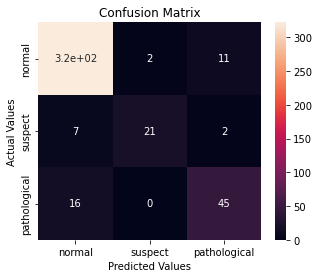

In [302]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Support Vector Machine

In [303]:
SVC_model = SVC()
SVC_model.fit(x_train,y_train)

SVC()

In [304]:
print(SVC_model.score(x_train,y_train))
print(SVC_model.score(x_test,y_test))

0.9294117647058824
0.9061032863849765


In [305]:
y_pred = SVC_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))


0.9061032863849765


In [306]:
cm3 =metrics.confusion_matrix(y_test, y_pred)
cm_df3 = pd.DataFrame(cm3,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
cr3= classification_report(y_test,y_pred)
print(cm3)
print(cr3)

[[326   1   8]
 [  4  22   4]
 [ 21   2  38]]
              precision    recall  f1-score   support

      normal       0.93      0.97      0.95       335
pathological       0.88      0.73      0.80        30
     suspect       0.76      0.62      0.68        61

    accuracy                           0.91       426
   macro avg       0.86      0.78      0.81       426
weighted avg       0.90      0.91      0.90       426



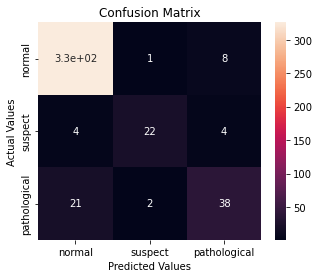

In [307]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# K-Nearest Neighbors

In [308]:
KN_model=KNeighborsClassifier()
KN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [309]:
print(KN_model.score(x_train,y_train))
print(KN_model.score(x_test,y_test))

0.9341176470588235
0.8896713615023474


In [310]:
y_pred = KN_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8896713615023474


In [311]:
cm4 =metrics.confusion_matrix(y_test, y_pred)
cm_df4 = pd.DataFrame(cm4,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
cr4= classification_report(y_test,y_pred)
print(cm4)
print(cr4)

[[326   1   8]
 [  7  20   3]
 [ 24   4  33]]
              precision    recall  f1-score   support

      normal       0.91      0.97      0.94       335
pathological       0.80      0.67      0.73        30
     suspect       0.75      0.54      0.63        61

    accuracy                           0.89       426
   macro avg       0.82      0.73      0.77       426
weighted avg       0.88      0.89      0.88       426



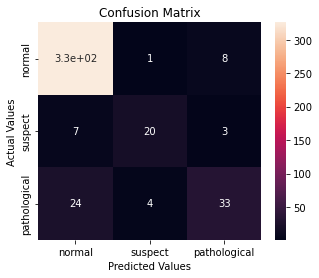

In [312]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df4, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Random Forest 

In [313]:
RandomForestClassifier_model=RandomForestClassifier()
RandomForestClassifier_model.fit(x_train,y_train)

RandomForestClassifier()

In [314]:
print(RandomForestClassifier_model.score(x_train,y_train))
print(RandomForestClassifier_model.score(x_test,y_test))

0.9994117647058823
0.9248826291079812


In [315]:
y_pred = RandomForestClassifier_model.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9248826291079812


In [316]:
cm5 =metrics.confusion_matrix(y_test, y_pred)
cm_df5 = pd.DataFrame(cm5,
                     index = ['normal','suspect','pathological'], 
                     columns = ['normal','suspect','pathological'])
cr5= classification_report(y_test,y_pred)
print(cm5)
print(cr5)

[[329   1   5]
 [  3  25   2]
 [ 19   2  40]]
              precision    recall  f1-score   support

      normal       0.94      0.98      0.96       335
pathological       0.89      0.83      0.86        30
     suspect       0.85      0.66      0.74        61

    accuracy                           0.92       426
   macro avg       0.89      0.82      0.85       426
weighted avg       0.92      0.92      0.92       426



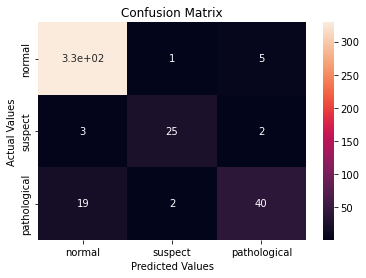

In [317]:
sns.heatmap(cm_df5, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Saving model

In [318]:
import pickle
filename='finalized_model.sav'
pickle.dump(RandomForestClassifier_model,open(filename,"wb"))

# loading model

In [319]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9248826291079812
